**Оглавление**<a id='toc0_'></a>    
- [Оглавление](#toc1_)    
- [Описание задачи](#toc2_)    
- [Описание исходных данных](#toc3_)    
  - [Описание признакового пространства](#toc3_1_)    
  - [Формулы прикладной области](#toc3_2_)    
- [Фиксация виртуального окружения](#toc4_)    
- [Предварительная обработка данных](#toc5_)    
  - [Чтение и загрузка данных](#toc5_1_)    
  - [Первичный анализ данных](#toc5_2_)    
  - [Разделение выборки на обучающую и тестовую выборки](#toc5_3_)    
  - [Обработка вещественных признаков (заполнение пропусков)](#toc5_4_)    
    - [Заполнение пропусков в признаке `Скорость перехода через портал`](#toc5_4_1_)    
    - [Заполним медианой](#toc5_4_2_)    
    - [Заполним средним](#toc5_4_3_)    
    - [Вычислим дивергенцию](#toc5_4_4_)    
    - [Машинные подходы](#toc5_4_5_)    
    - [IterativeImputer](#toc5_4_6_)    
    - [KNN Imputer](#toc5_4_7_)    
    - [Вычислим дивергенцию для машинных методов](#toc5_4_8_)    
  - [Кодирование категориальных признаков](#toc5_5_)    
  - [Детекция выбросов и аномалий в данных](#toc5_6_)    
    - [IQR](#toc5_6_1_)    
    - [r_z score](#toc5_6_2_)    
    - [IsonlationForest](#toc5_6_3_)    
    - [OCSVM](#toc5_6_4_)    
    - [DBSCAN](#toc5_6_5_)    
  - [Подведение итогов раздела 1](#toc5_7_)    
- [Генерация новых признаков](#toc6_)    
  - [Корреляционный анализ входных признаков (построение тепловых карт корреляции)](#toc6_1_)    
  - [Исправление проблемы мультиколлинеарности в данных](#toc6_2_)    
  - [Скалирование данных](#toc6_3_)    
    - [Уменьшим признаковое пространстов с помощью PCA](#toc6_3_1_)    
  - [Подведение итогов раздела 2](#toc6_4_)    
- [Выбор моделей ML и метрик](#toc7_)    
    - [Выбор моделей](#toc7_1_1_)    
    - [Выбор метрик](#toc7_1_2_)    
    - [Формируем сетки гиперпараметров](#toc7_1_3_)    
- [Обучение моделей ML и подбор гиперпараметров](#toc8_)    
    - [CatBoost](#toc8_1_1_)    
    - [Random Forest](#toc8_1_2_)    
    - [Ridge](#toc8_1_3_)    
- [Вычисление метрик на новых данных](#toc9_)    
    - [Метрики с CatBoost](#toc9_1_1_)    
    - [Метрики с Random Forest](#toc9_1_2_)    
    - [Метрики с Ridge](#toc9_1_3_)    
- [Результат работы](#toc10_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Описание задачи](#toc0_)

В тёмных залах Каэр Морхена стоит древний портал, известный как Врата Вечности. Этот артефакт, созданный давно исчезнувшими магами, открывает путь между мирами. За ним присматривают ведьмаки Геральт, Весемир и Ламберт в компании чародеек Филиппы Эйльхарт и Киры Мец. Лютик, не упускающий шанса стать частью любой захватывающей истории, также здесь, помогая (или, скорее, мешая) исследованиям своими балладами и стихами.

Главный показатель состояния портала Гармония Бессмертия. Этот коэффициент демонстрирует, насколько сильно изношен портал: как только Гармония достигнет критического уровня, магия Врат Вечности начнёт угасать, и портал может разрушиться, оставив Миры отделёнными и создав угрозу для тех, кто находится поблизости. Чтобы спрогнозировать будущее портала, чародейки, ведьмаки и Лютик (несмотря на свои сомнительные навыки в магии) собирают данные о его работе, отслеживая потоки силы, ритм магического ядра, давление стихийной энергии и прочие важные параметры. Ux задача предсказать изменения Гармонии Бессмертия, чтобы успеть вмешаться до того, как портал разрушится, и сохранить этот древний путь между мирами для будущих поколений. 

Это задача **регрессии**.
Требуется предсказать **вещественный** признак "Гармония бессмертия"

# <a id='toc3_'></a>[Описание исходных данных](#toc0_)

## <a id='toc3_1_'></a>[Описание признакового пространства](#toc0_)

| **№** | **Признак** | **Описание** | **Тип данных признака** |
|---|---|---|---|
| **1** | Вектор мощи: | Позиция магического механизма, управляющего интенсивностью перехода через портал | Вещественный |
| **2** | Скорость перехода через портал | Скорость, с которой портал перемещает объект через пространство | Вещественный |
| **3** | Приток Силы Потока | Поток магической силы, текущий через ядро портала, обеспечивая его стабильную работу | Вещественный |
| **4** | Ритм магического ядра | Число оборотов магического ядра портала в минуту | Вещественный |
| **5** | Поток Энергий | Число оборотов генератора эфира, преобразующего внешнюю энергию в магическую | Вещественный |
| **6** | Сила Левого Потока | Мощность магического потока, текущего через левую сторону портала, поддерживая его баланс | Вещественный |
| **7** | Сила Правого Потока | Мощность магического потока, текущего через правую сторону портала, обеспечивая равномерное распределение энергии | Вещественный |
| **8** | Пламя Стихий | Температура магической энергии, исходящей из высокого магического источника портала, в градусах Цельсия | Вещественный |
| **9** | Температура вдоха Истока | Температура воздуха, входящего в магический ускоритель портала, в градусах Цельсия | Целочисленный |
| **10** | Температура выдоха Истока | Температура воздуха, исходящего из магического ускорителя портала, в градусах Цельсия | Вещественный |
| **11** | Приток давления Выдоха Истока | Давление магического потока на выходе из магического источника высокого давления | Вещественный |
| **12** | Давление вдоха Истока | Давление вдоха Истока: Давление воздуха, входящего в магический ускоритель | Вещественный |
| **13** | Давление выдоха Истока | Давление воздуха, исходящего из магического ускорителя | Вещественный |
| **14** | Древний Ветер | Давление древней магической энергии, покидающей портал в виде выхлопного потока | Вещественный |
| **15** | Печать Чародея | Параметр управления магическим впрыском в сердце портала, выраженный в процентах | Вещественный |
| **16** | Эмульсия Истока | Эмульсия Истока: Количество магического топлива, подпитывающего портал | Вещественный |
| **17** | Дыхание Истока | Коэффициент, отображающий степень угасания магического ускорителя | Вещественный |
| **18** | **Гармония Бессмертия** - целевая переменная | Коэффициент, указывающий на состояние магического ядра портала и его стабильность, требующий магического восстановления в случае снижения | Вещественный |
| **19** | Тип Вектора Мощи | Метка типа позиции магического механизма | Категориальный |
| **20** | Номер пометки | Уникальный номер записи о работе портала в блокноте | Целочисленный |

## <a id='toc3_2_'></a>[Формулы прикладной области](#toc0_)

$$
\begin{align}
\text{Общая мощность потоков} &= \text{Сила Левого Потока} + \text{Сила Правого Потока} + \text{Приток Силы Потока} \notag \\
\text{Общая сила ядра} &= \text{Ритм магического ядра} \times \text{Приток Силы Потока} \notag \\
\text{Общее давление на выходе} &= \text{Приток давления Выдоха Истока} + \text{Давление выдоха Истока} \notag \\
\text{Магическая производительность} &= \frac{\text{Скорость перехода через портал}}{\text{Эмульсия Истока}} \notag \\
\text{Эффективность ядра} &= \frac{\text{Общая сила ядра}}{\text{Эмульсия Истока}} \notag \\
\text{Магическая мощность} &= \text{Эмульсия Истока} + \text{Общее давление} + \text{Пламя Стихий} - \text{Температура вдоха Истока} \notag \\
\text{Степень износа магических источников} &= \frac{\text{Дыхание Истока}}{\text{Гармония Бессмертия}} \notag \\
\text{Расхождения в стабильности магии} &= \left| \text{Дыхание Истока} - \text{Гармония Бессмертия} \right| \notag \\
\text{Баланс угасания} &= \frac{\text{Дыхание Истока} - \text{Гармония Бессмертия}}{\text{Скорость перехода через портал}} \notag
\end{align}
$$

Важно отметить, что при генерации признаков, мы не можем использовать последние 3 формулы, так как это приведёт к утечке данных

# <a id='toc4_'></a>[Фиксация виртуального окружения](#toc0_)

Версия Python: 3.10

Используемые библиотеки:
- pandas: 2.2.3
- matplotlib: 3.10.6
- seaborn: 0.13.2
- sklearn: 1.6.1
- numpy: 1.26.4
- scipy: 1.13.1
- optuna: 4.6.0
- pyod: 2.0.5
- umap: 0.5.9
- catboost 1.2.7

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import typing as t
import matplotlib.pyplot as plt
import scipy.stats as stats
import umap
import optuna
import pyod
import warnings

In [10]:
warnings.filterwarnings('ignore')

In [11]:
seed = 42
np.random.seed(seed)

# <a id='toc5_'></a>[Предварительная обработка данных](#toc0_)

## <a id='toc5_1_'></a>[Чтение и загрузка данных](#toc0_)

Загрузим датафрейм. 
- Разделитель: `|`
- Кодировка: `cp1251`

In [5]:
df = pd.read_csv(r"../../data/portal_data.csv", sep='|', encoding='cp1251')
df.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,-,1.096,Не определено,5.947,-,7.137,0.082,0.95,0.975,Слабый,0
1,2.088,-,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый,1
2,3.144,4.6299600000000005,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,-,1.389,Не определено,7.574,-,13.086,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,-,1.658,Не определено,9.007,-,18.109,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.7166,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,Не определено,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего,4


## <a id='toc5_2_'></a>[Первичный анализ данных](#toc0_)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  object 
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       11934 non-null  object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           11934 non-null  object 
 12  Давление выдоха Истока          

Видим, что некоторые столбцы нужно приводить к числовому типу:
- Скорость перехода через портал
- Температура выдоха Истока
- Давление вдоха Истока
- Древний Ветер
- Тип Вектора Мощи

Выполним приведение к типу

In [8]:
df['Скорость перехода через портал'] = pd.to_numeric(df['Скорость перехода через портал'], errors='coerce')
df['Температура выдоха Истока'] = pd.to_numeric(df['Температура выдоха Истока'], errors='coerce')
df['Давление вдоха Истока'] = pd.to_numeric(df['Давление вдоха Истока'], errors='coerce')
df['Древний Ветер'] = pd.to_numeric(df['Древний Ветер'], errors='coerce')

In [9]:
df['Тип Вектора Мощи'].value_counts()

Тип Вектора Мощи
Сильный          3978
Слабый           2652
Ниже среднего    2652
Выше среднего    2652
Name: count, dtype: int64

Видим, что дисбаланса по этому признаку нет, что является хорошим показателем

## <a id='toc5_3_'></a>[Разделение выборки на обучающую и тестовую выборки](#toc0_)

В нашем датасете достаточно много данных. Возьмём стандартное соотношение 80/20, так как данных много. При таком разбиении у нас и будет хватать данных для обучения модели, и будет достаточно много данных для тестирования модели

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns=['Гармония Бессмертия'], axis=1)
y = df['Гармония Бессмертия']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
df2 = pd.concat((X, y), axis=1)

In [20]:
df2.head(10)

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,1.096,5.947,7.137,0.082,0.95,1,0.975
1,2.088,NaN,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,1.331,7.282,10.655,0.287,0.95,1,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,1.389,7.574,13.086,0.259,0.95,2,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,1.658,9.007,18.109,0.358,0.95,2,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,2.078,11.197,26.373,0.522,0.95,3,0.975
5,6.175,9.25992,29792.731,241.630782,8828.360,246.278,246.278,800.434,736,2.501,13.356,35.760,0.708,0.95,3,0.975
6,7.148,10.80324,38982.180,280.448510,9132.429,332.077,332.077,854.747,736,2.963,15.679,45.881,0.908,0.95,4,0.975
7,8.206,12.34656,50996.808,323.328632,9318.562,437.989,437.989,952.122,736,3.576,18.632,62.440,1.236,0.95,4,0.975
8,9.300,13.88988,72763.329,372.843693,9778.528,644.905,644.905,1115.797,736,4.498,22.811,92.556,1.832,0.95,4,0.975
9,1.138,1.54332,379.880,141.934538,6683.916,7.915,7.915,464.017,736,1.100,5.963,3.879,0.079,0.95,1,0.976


In [21]:
import pickle
with open(r'../../data/pract_dataset.pkl', 'wb') as f:
    pickle.dump(df2, f)

## <a id='toc5_4_'></a>[Обработка вещественных признаков (заполнение пропусков)](#toc0_)

Сначала посмотрим процент заполненности столбцов значениями

In [13]:
(df.notna().sum() / len(df) * 100).round(2)

Вектор Мощи                       100.00
Скорость перехода через портал     89.92
Приток Силы Потока                100.00
Ритм магического ядра             100.00
Поток Энергий                     100.00
Сила Левого Потока                100.00
Сила Правого Потока               100.00
Пламя Стихий                      100.00
Температура вдоха Истока          100.00
Температура выдоха Истока          20.00
Приток давления Выдоха Истока     100.00
Давление вдоха Истока              20.44
Давление выдоха Истока            100.00
Древний Ветер                      20.00
Печать Чародея                    100.00
Эмульсия Истока                   100.00
Дыхание Истока                    100.00
Гармония Бессмертия               100.00
Тип Вектора Мощи                  100.00
Номер пометки                     100.00
dtype: float64

Видим пропуски в следующих признаках

Отбросим признаки:
- `Номер пометки` - уникальные номера
- `Температура выдоха Истока` - слишко мало значений, не являющихся NaN
- `Давление вдоха Истока` - слишко мало значений, не являющихся NaN
- `Древний Ветер` - слишко мало значений, не являющихся NaN

`Скорость перехода через портал` будем заполнять статистическими и машинными методами

In [14]:
columns = ['Номер пометки', 'Температура выдоха Истока', 'Давление вдоха Истока', 'Древний Ветер']
df = df.drop(columns=columns, axis=1)

### <a id='toc5_4_1_'></a>[Заполнение пропусков в признаке `Скорость перехода через портал`](#toc0_)

### <a id='toc5_4_2_'></a>[Заполним медианой](#toc0_)

In [7]:
median = X_train['Скорость перехода через портал'].median()
df_median = df.copy()
df_median['Скорость перехода через портал'] = df['Скорость перехода через портал'].fillna(median)

In [8]:
df_median.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,1.096,5.947,7.137,0.082,0.95,1,0.975
1,2.088,7.71660,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,1.331,7.282,10.655,0.287,0.95,1,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,1.389,7.574,13.086,0.259,0.95,2,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,1.658,9.007,18.109,0.358,0.95,2,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,2.078,11.197,26.373,0.522,0.95,3,0.975


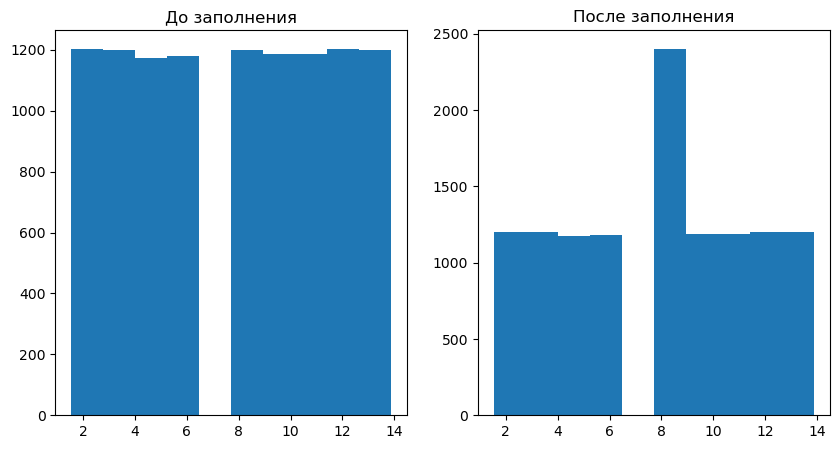

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].hist(df['Скорость перехода через портал'])
ax[0].set_title('До заполнения')
ax[1].hist(df_median['Скорость перехода через портал'])
ax[1].set_title('После заполнения')
plt.show()

Видим, что данное заполнение довольно сильно изменяет распределение, что нехорошо. Попробуем другие способы заполнения

### <a id='toc5_4_3_'></a>[Заполним средним](#toc0_)

In [10]:
mean = X_train['Скорость перехода через портал'].mean()
df_mean = df.copy()
df_mean['Скорость перехода через портал'] = df['Скорость перехода через портал'].fillna(mean)

In [11]:
df_mean.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия
0,1.138,1.543320,289.964,141.318158,6677.380,7.584,7.584,464.006,736,1.096,5.947,7.137,0.082,0.95,1,0.975
1,2.088,7.725235,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,1.331,7.282,10.655,0.287,0.95,1,0.975
2,3.144,4.629960,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,1.389,7.574,13.086,0.259,0.95,2,0.975
3,4.161,6.173280,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,1.658,9.007,18.109,0.358,0.95,2,0.975
4,5.140,7.716600,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,2.078,11.197,26.373,0.522,0.95,3,0.975


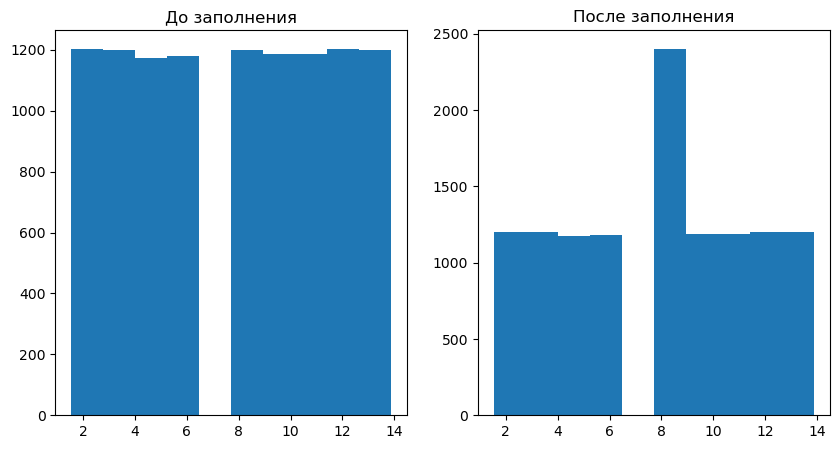

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].hist(df['Скорость перехода через портал'])
ax[0].set_title('До заполнения')
ax[1].hist(df_mean['Скорость перехода через портал'])
ax[1].set_title('После заполнения')
plt.show()

Так как медиана от среденего почти не отличаеются, то заполнение практически идентичное

### <a id='toc5_4_4_'></a>[Вычислим дивергенцию](#toc0_)

In [13]:
p, _ = np.histogram(df['Скорость перехода через портал'].dropna(), bins=20, density=True)
q1, _ = np.histogram(df_median['Скорость перехода через портал'], bins=20, density=True)
q2, _ = np.histogram(df_mean['Скорость перехода через портал'], bins=20, density=True)

p += 1e-12
q1 += 1e-12
q2 += 1e-12

d1 = np.sum(p * np.log(p / q1))
d2 = np.sum(p * np.log(p / q2))
print(f"Дивергенция после заполнения медианой: {d1}")
print(f"Дивергенция после заполнения средним: {d2}")

Дивергенция после заполнения медианой: 0.0463342976928194
Дивергенция после заполнения средним: 0.0463342976928194


Дивергенция одинаковая и при заполнении медианой и при заполнении средним, что ещё раз указывает на то, что медиана от среднего не отличается. Попробуем машинные методы

### <a id='toc5_4_5_'></a>[Машинные подходы](#toc0_)

### <a id='toc5_4_6_'></a>[IterativeImputer](#toc0_)

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

In [15]:
imp = IterativeImputer(max_iter=100, random_state=42)
imp.fit(X_train)

IterativeImputer(max_iter=100, random_state=42)

In [16]:
X_train_IterativeImputer = imp.transform(X_train)
X_test_IterativeImputer = imp.transform(X_test)

In [17]:
df_IterativeImputer = pd.concat([
    pd.DataFrame(X_train_IterativeImputer, columns=X_train.columns),
    pd.DataFrame(X_test_IterativeImputer, columns=X_train.columns)
], axis=0)

In [18]:
df_IterativeImputer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11934 entries, 0 to 2386
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  float64
 9   Приток давления Выдоха Истока   11934 non-null  float64
 10  Давление выдоха Истока          11934 non-null  float64
 11  Печать Чародея                  11934 non-null  float64
 12  Эмульсия Истока                 11934 

### <a id='toc5_4_7_'></a>[KNN Imputer](#toc0_)

In [19]:
knn_imp = KNNImputer()
knn_imp.fit(X_train)

KNNImputer()

In [20]:
X_train_KNNImputer = knn_imp.transform(X_train)
X_test_KNNImputer = knn_imp.transform(X_test)

In [21]:
df_train_imp = pd.DataFrame(
    X_train_KNNImputer, 
    columns=X_train.columns, 
    index=X_train.index
)

df_test_imp = pd.DataFrame(
    X_test_KNNImputer, 
    columns=X_train.columns, 
    index=X_test.index 
)
df_KNNImputer = pd.concat([df_train_imp, df_test_imp], axis=0)

In [22]:
df_KNNImputer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11934 entries, 2992 to 1492
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  float64
 9   Приток давления Выдоха Истока   11934 non-null  float64
 10  Давление выдоха Истока          11934 non-null  float64
 11  Печать Чародея                  11934 non-null  float64
 12  Эмульсия Истока                 119

### <a id='toc5_4_8_'></a>[Вычислим дивергенцию для машинных методов](#toc0_)

In [23]:
p, _ = np.histogram(df['Скорость перехода через портал'].dropna(), bins=20, density=True)
q1, _ = np.histogram(df_IterativeImputer['Скорость перехода через портал'], bins=20, density=True)
q2, _ = np.histogram(df_KNNImputer['Скорость перехода через портал'], bins=20, density=True)

p += 1e-12
q1 += 1e-12
q2 += 1e-12

d1 = np.sum(p * np.log(p / q1))
d2 = np.sum(p * np.log(p / q2))
print(f"Дивергенция после IterativeImputer: {d1}")
print(f"Дивергенция после KNNImputer: {d2}")

Дивергенция после IterativeImputer: 9.719260027398146
Дивергенция после KNNImputer: 0.0007433870986386889


Видим, что KNN Imputer очень хорошо заполнил пропуски. Дивергенция очень близка к нулевому значению. IterativeImputer заполнил пропуски хуже, чем статистические методы. Поэтому построим график для KNN Imputer и посмотрим на распределение

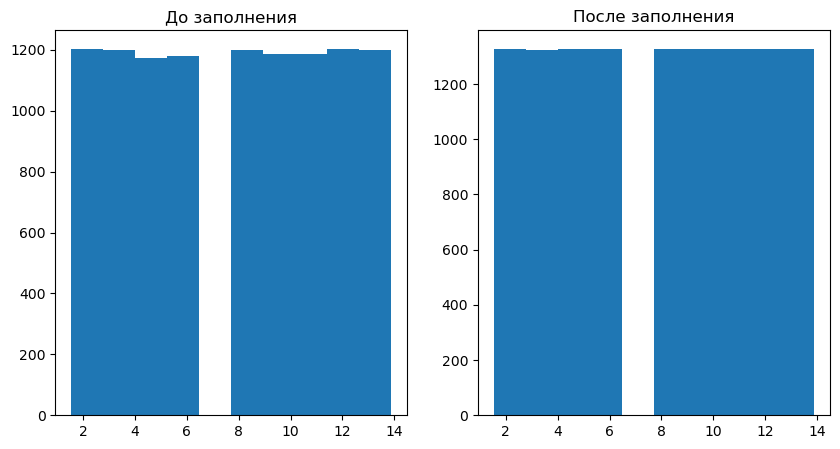

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].hist(df['Скорость перехода через портал'])
ax[0].set_title('До заполнения')
ax[1].hist(df_KNNImputer['Скорость перехода через портал'])
ax[1].set_title('После заполнения')
plt.show()

После заполнения пропусков с помощью KNN Imputer распределение почти не отличается от изначального. Поэтому выберим именно его.

In [26]:
df_compute = pd.concat((df_KNNImputer, y), axis=1)

In [27]:
df_compute.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия
2992,5.140,7.71660,21636.019,201.516728,8501.313,175.299,175.299,705.599,736.0,2.077,10.988,24.967,0.494,0.962,3.0,0.995
7193,3.144,4.62996,8377.498,145.219911,7092.180,60.337,60.337,577.042,736.0,1.390,7.450,11.942,0.236,0.980,2.0,0.994
3098,3.144,4.62996,8378.222,145.220330,7097.374,60.341,60.341,595.018,736.0,1.390,7.536,12.660,0.251,0.963,2.0,0.981
11533,5.140,7.71660,21621.936,201.513691,8454.950,175.226,175.226,698.997,736.0,2.092,11.191,24.816,0.491,0.999,3.0,0.982
4876,8.206,12.34656,50993.998,323.323396,9314.902,438.071,438.071,916.782,736.0,3.573,18.263,59.619,1.180,0.970,4.0,0.996


In [28]:
import pickle
with open(r'../../data/pract_dataset_lab3.pkl', 'wb') as f:
    pickle.dump(df_compute, f)

## <a id='toc5_5_'></a>[Кодирование категориальных признаков](#toc0_)

У нас имеется 1 категориальный признак `Тип Вектора Мощи`. Так как можно установить порядок, закодируем просто с помощью Label Encoding

In [10]:
mapping = {
    "Сильный": 4,
    "Выше среднего": 3,
    "Ниже среднего": 2,
    "Слабый": 1
}
df['Тип Вектора Мощи'] = df['Тип Вектора Мощи'].map(mapping)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       2387 non-null   float64
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           2439 non-null   float64
 12  Давление выдоха Истока          

## <a id='toc5_6_'></a>[Детекция выбросов и аномалий в данных](#toc0_)

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats

In [2]:
with open('../../data/pract_dataset_lab3.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

Попробуем обнаружить аномалии и выбросы при помощи графика "Ящик с усами"

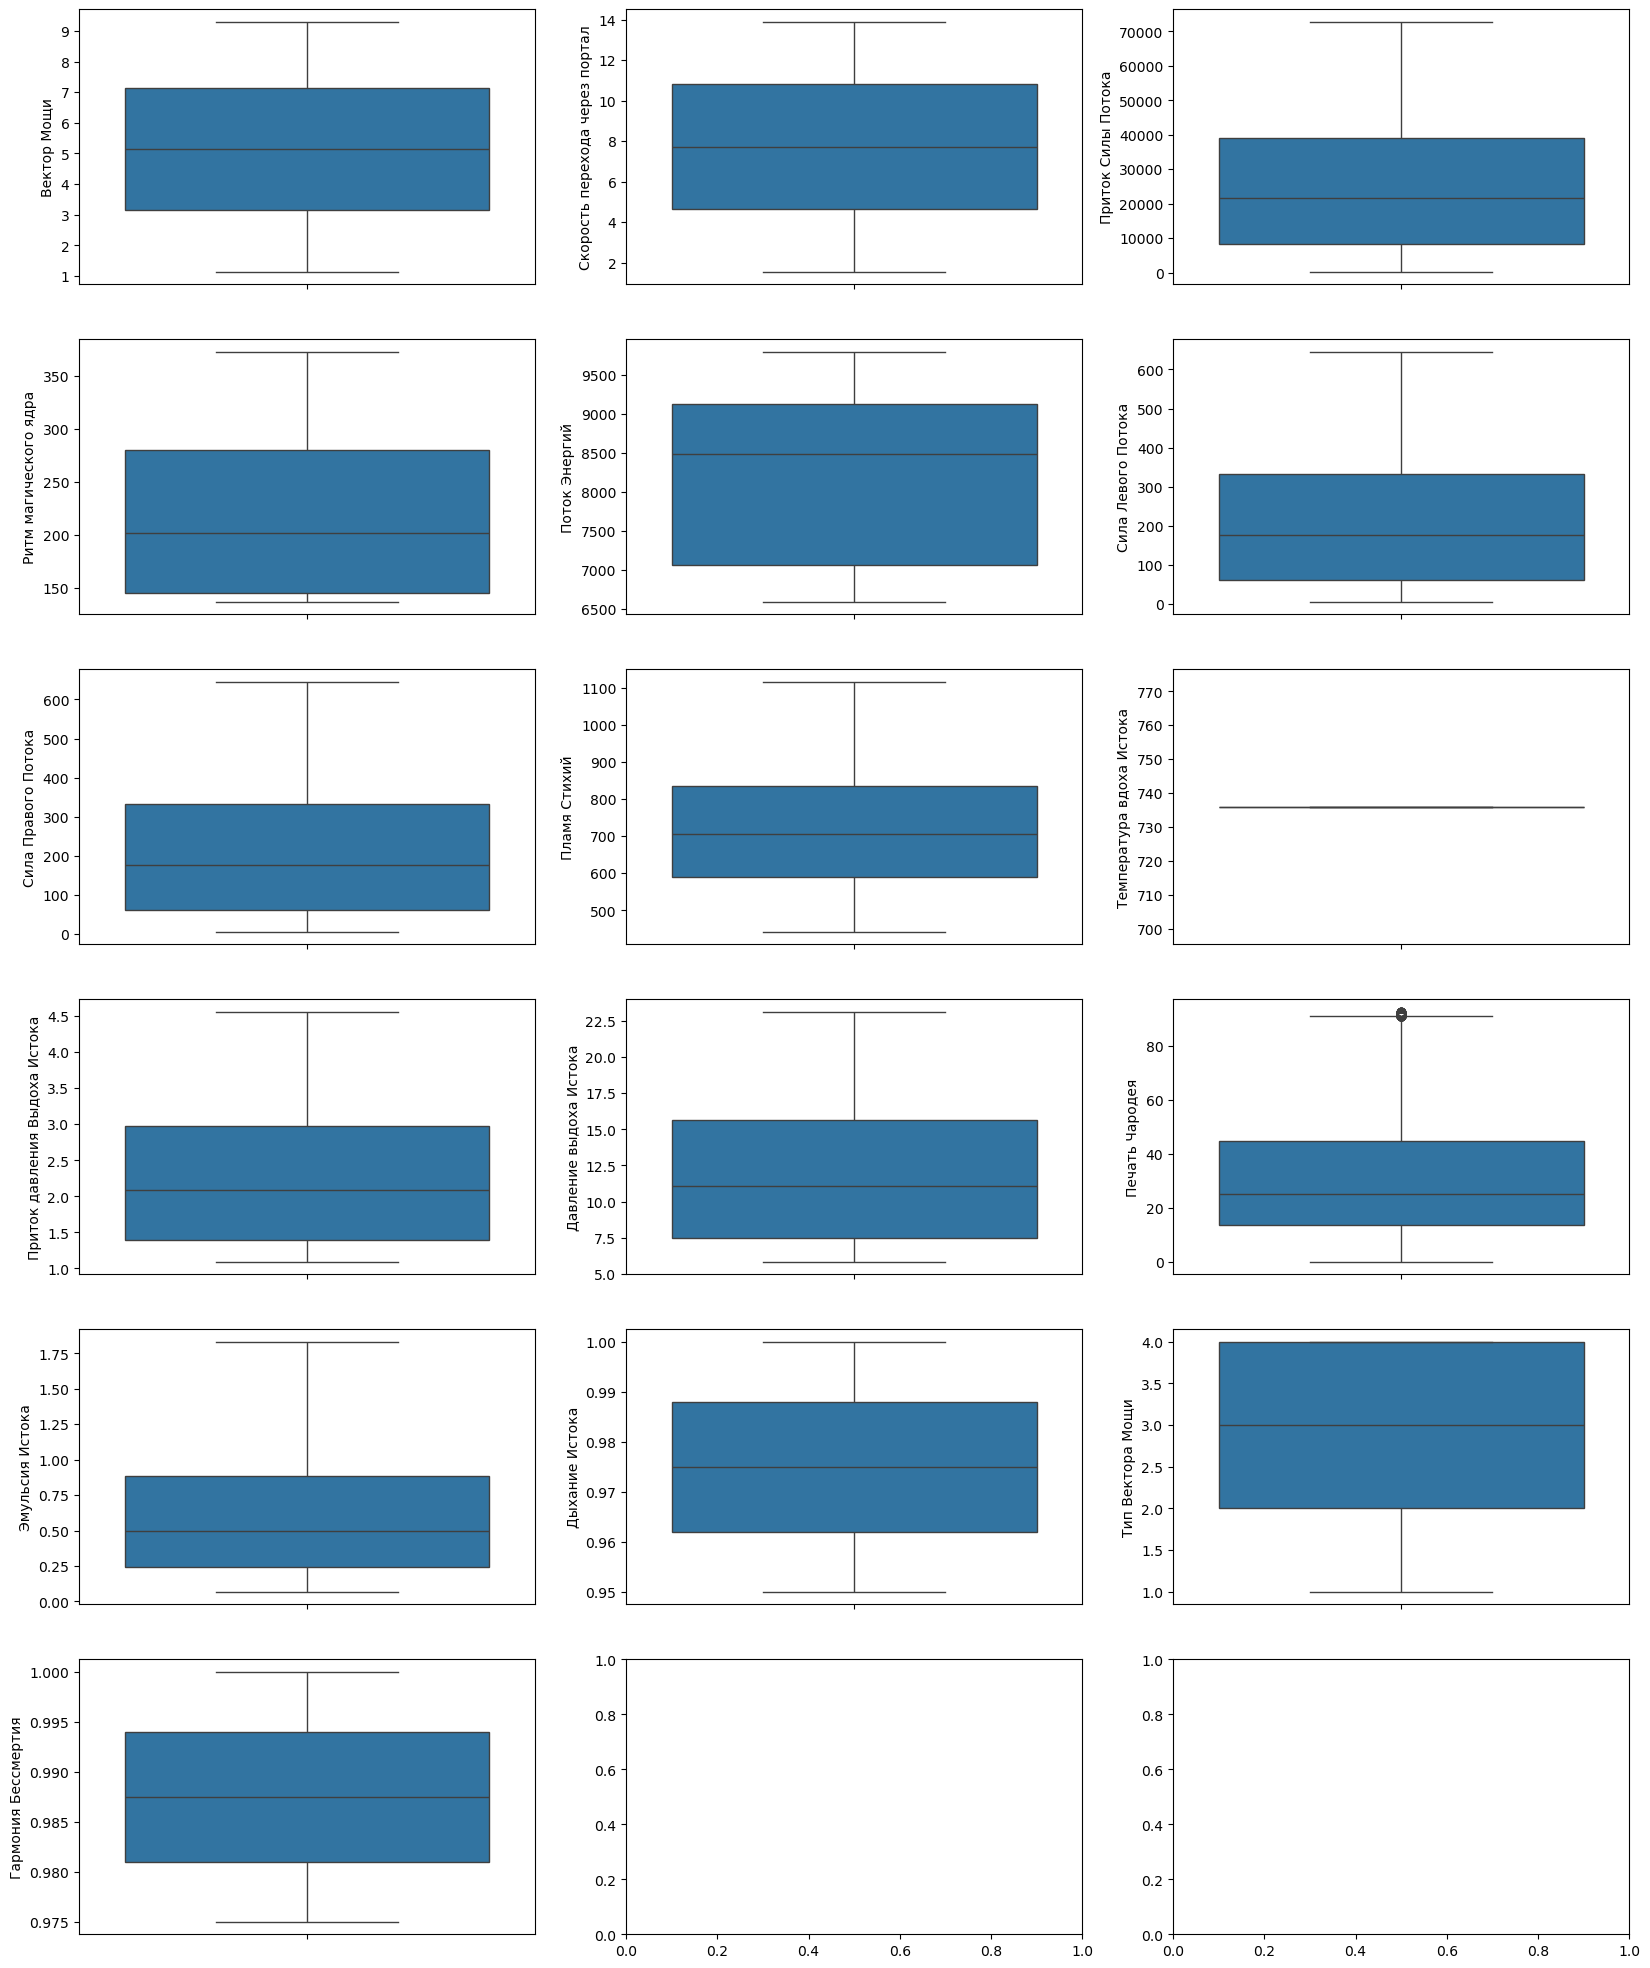

In [4]:
n_col = 3
n = len(df.columns)
n_row = int(np.ceil(n / n_col))

_, ax = plt.subplots(n_row, n_col, figsize=(20, 25))

columns = df.columns

for i in range(n_row):
    for j in range(n_col):
        k = i * n_col + j
        if k == n:
            break
        column = columns[k]
        x = df[column]
        sns.boxplot(x, ax=ax[i, j])

Видим выбросы в признаке "Печать чародея". Попробуем следующие способы обнаружения выбросов:
- IQR
- r_z score
- isolation forest
- ocsvm
- dbscan

### <a id='toc5_6_1_'></a>[IQR](#toc0_)

In [5]:
q1, q3 = np.percentile(df_train['Печать Чародея'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [6]:
df_train_iqr_out = df_train[(df_train['Печать Чародея'] < lower_bound) | (df_train['Печать Чародея'] > upper_bound)]
df_train_iqr_out.index

Index([3761,  512,   80,  134, 2150, 3752, 3302,  944, 3059,  269,
       ...
       2114, 1250, 2159,  746, 1457, 1448, 3284, 1952, 2177, 3293],
      dtype='int64', length=125)

### <a id='toc5_6_2_'></a>[r_z score](#toc0_)

In [7]:
median = df_train['Печать Чародея'].median()
mad = (np.abs(df_train['Печать Чародея'] - median)).median()
r_z_score = 0.6745*(df_train['Печать Чародея'] - median) / mad

In [8]:
df_train_rzscore_out = df_train[np.abs(df_train['Печать Чародея']) > 3]

In [9]:
df_train_rzscore_out.index

Index([ 8352,  2542,  3562,  3371,  6000,  9300,  1677,  1135, 11696,  5346,
       ...
        1583,  6524, 10139,  3293,  1319,  7771,   148,  7253, 11136,  1919],
      dtype='int64', length=8734)

In [10]:
out_idx = set(df_train_iqr_out.index) & set(df_train_rzscore_out.index)

In [11]:
len(out_idx)

125

In [15]:
import pickle

with open(r"../../data/df_train_stat_proccessed.pkl", 'wb') as f:
    pickle.dump(df_train_stat_proccessed, f)

with open(r"../../data/df_test.pkl", 'wb') as f:
    pickle.dump(df_test, f)

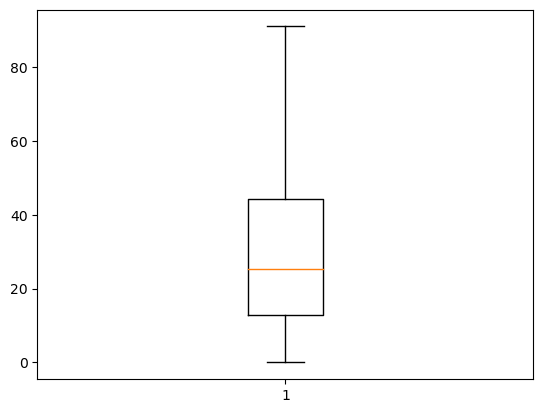

In [13]:
plt.boxplot(df_train_stat_proccessed['Печать Чародея'])
plt.show()

Видим, что выбросы пропали на графике после их определения статистическими способами

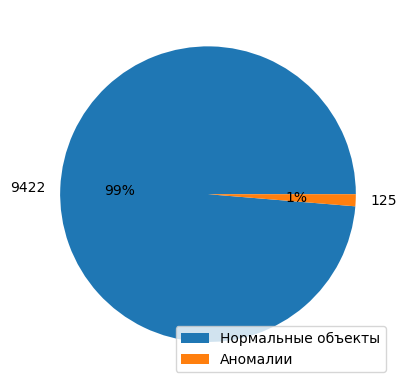

In [47]:
_, counts = np.unique(isf_anomaly.astype(bool), return_counts=True)

plt.pie([len(df_train) - len(out_idx), len(out_idx)], labels=[len(df_train) - len(out_idx), len(out_idx)], autopct='%1.0f%%');
plt.legend([
    'Нормальные объекты', 'Аномалии'
], loc='lower right');

После нахождения пересечения объектов, найденных с помощью `IQR` и `r_z score` получаем 125 объектов-выбросов. Это составляет около 1% от общего числа объектов

In [14]:
X_train = df_train.drop(columns=['Гармония Бессмертия'])

Далее попробуем найти аномалии при помощи машинных методов:
- IsonlationForest
- OCSVM
- DBSCAN

Для отображения аномалий на плоскости используем метод `umap`

### <a id='toc5_6_3_'></a>[IsonlationForest](#toc0_)

In [15]:
from umap import UMAP

In [16]:
umap = UMAP().fit(X_train)
X_2d = umap.transform(X_train)

C:\Users\Denis\miniconda3\envs\myenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [17]:
from pyod.models.iforest import IForest

isf = IForest().fit(X_train)
isf_anomaly = isf.predict(X_train)

C:\Users\Denis\miniconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


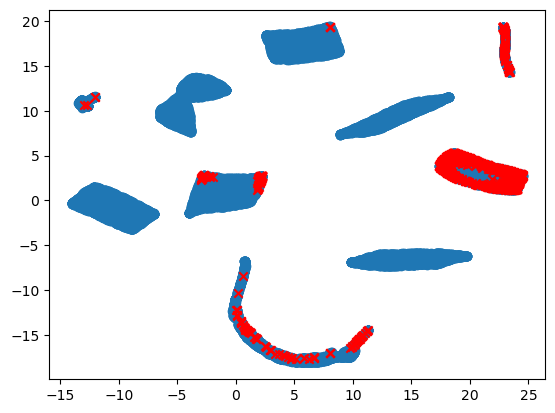

In [18]:
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.scatter(X_2d[isf_anomaly.astype(bool), 0], X_2d[isf_anomaly.astype(bool), 1], c='red', marker='x')

Красными точками обозначены аномалии, обнаруженные методом `IsolationForest`

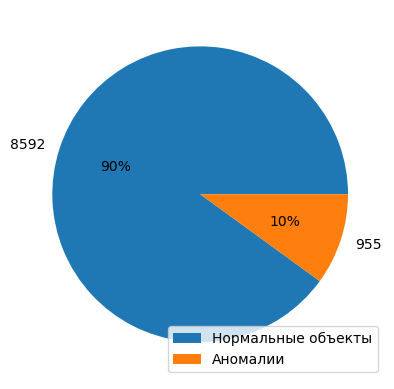

In [19]:
_, counts = np.unique(isf_anomaly.astype(bool), return_counts=True)

plt.pie(counts, labels=counts, autopct='%1.0f%%');
plt.legend([
    'Нормальные объекты', 'Аномалии'
], loc='lower right');

Метод `IsonlationForest` обнаружил 955 аномалий, что составляет 10% от общего числа объектов.

### <a id='toc5_6_4_'></a>[OCSVM](#toc0_)

In [20]:
from pyod.models.ocsvm import OCSVM

ocsvm = OCSVM().fit(X_train)
ocsvm_anomaly = ocsvm.predict(X_train)

C:\Users\Denis\miniconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


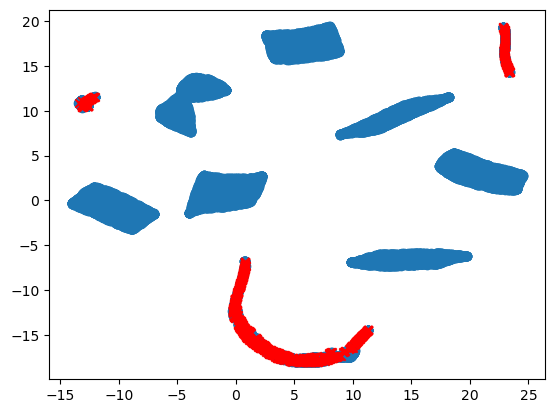

In [21]:
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.scatter(X_2d[ocsvm_anomaly.astype(bool), 0], X_2d[ocsvm_anomaly.astype(bool), 1], c='red', marker='x')

Красными точками обозначены аномалии, обнаруженные методом `OCSVM`

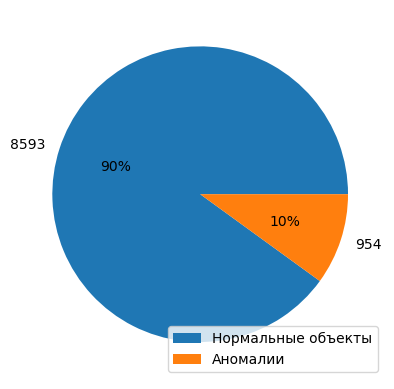

In [22]:
_, counts = np.unique(ocsvm_anomaly.astype(bool), return_counts=True)

plt.pie(counts, labels=counts, autopct='%1.0f%%');
plt.legend([
    'Нормальные объекты', 'Аномалии'
], loc='lower right');

Метод `OCSVM` обнаружил 954 аномалий, что составляет 10% от общего числа объектов. Это почти столько же, сколько и обнаружил метод `Isolation Forest`, однако сами объекты отличаются

### <a id='toc5_6_5_'></a>[DBSCAN](#toc0_)

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
dbscan = DBSCAN(eps=10, min_samples=5).fit(X_train)
dbscan_labels = dbscan.labels_

anomaly_mask_dbscan = dbscan_labels == -1

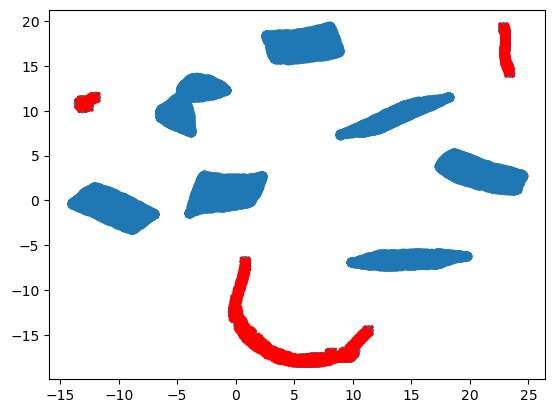

In [25]:
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.scatter(X_2d[anomaly_mask_dbscan, 0], X_2d[anomaly_mask_dbscan, 1], c='red', marker='x')

Красными точками обозначены аномалии, обнаруженные методом `DBSCAN`

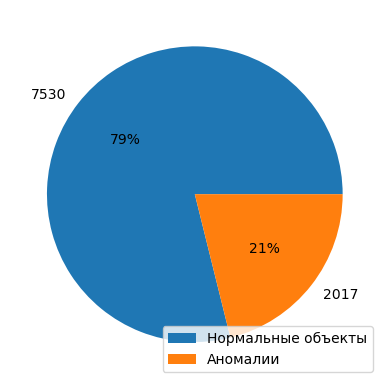

In [26]:
_, counts = np.unique(anomaly_mask_dbscan, return_counts=True)
plt.pie(counts, labels=counts, autopct='%1.0f%%')
plt.legend(['Нормальные объекты', 'Аномалии'], loc='lower right')
plt.show()

Видим, что `DBSCAN` выделил больше всего аномалий. 21% от общего числа. Возможно dbscan не очень хорошо подходит для данной задачи, но мы найдём пересечение объектов, обнаруженных с помощью DBSCAN, с объектами, которые были обнаружены специальными методами для обнаружения аномалий.

In [38]:
ml_anomalies = np.all(np.array([
    isf_anomaly,
    ocsvm_anomaly,
    anomaly_mask_dbscan
]), axis=0)
ml_anomalies

array([ True, False, False, ..., False, False, False])

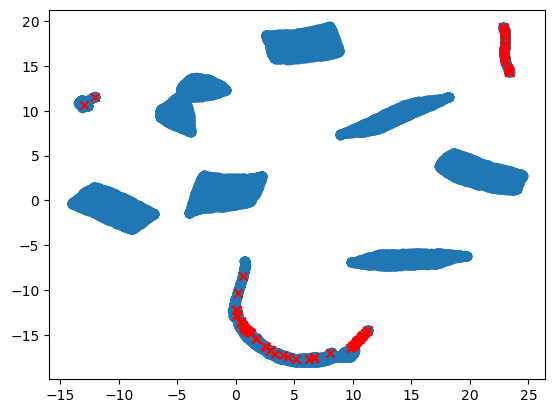

In [39]:
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.scatter(X_2d[ml_anomalies, 0], X_2d[ml_anomalies, 1], c='red', marker='x')

Красными точками обозначены аномалии, обнаруженные методоми `Isolation Forest`, `OCSVM`, `DBSCAN` одновременно

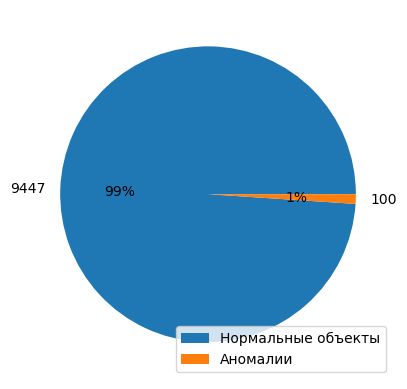

In [40]:
_, counts = np.unique(ml_anomaly, return_counts=True)
plt.pie(counts, labels=counts, autopct='%1.0f%%')
plt.legend(['Нормальные объекты', 'Аномалии'], loc='lower right')
plt.show()

Видим, что при пересечении всех множеств аномалий, обнаруженных 3 разными способами, получаем 100 объектов. Это составляет 1% от общего числа объектов. Удалим эти объекты из датасета

In [42]:
anomaly_index = df_train.loc[ml_anomalies].index
anomaly_index

Index([ 8352,  4050,  1080,  5247,  6201,   918,  1602,  9072,  3807,  5724,
        1332,  4167,  5004,  6687,   162,   621,  3330,   459,  3951,  2124,
        4761,  1566,  7398,    90,   945,  3222,   873,  2511,  2997,  5490,
        3087,  2520,  1809,  4176,   630,   837,  1089,  2286,   207,   603,
         189,  1575,   171,  6678,  1647,  8118,   702,   657,  2988,   333,
        2268,  2754,   666,  3708,   144,   711,  4041,   612,  3240,     9,
        2502,  1404,  4878,  3213,  1179,   864,   936,  4518,  2133,  6543,
        6066, 10755,  2610,  7641,  3096,  9090,  2277,   855,   108,   891,
        4995,   126,  8595,  1314,  6921,  1548,  2844,  3798,  1413,   900,
        5013,   387,  5715,  1323,  6075,  6912,  5355,   909,  1818,  3942],
      dtype='int64')

In [43]:
df_train_ml_proccessed = df_train.drop(index=anomaly_index)

## <a id='toc5_7_'></a>[Подведение итогов раздела 1](#toc0_)
<!-- А таких разделах обычно подытоживается вся информация о тех действиях, которые вы делали в разделе -->

В итоге мы заполнили пропуски в данных, привели все значения к числовому типу, закодировали категориальные признаки, удалили выбросы и аномалии.

В результате проведённых преобразований получен очищенный, однородный и готовый к анализу набор данных. Все признаки теперь представлены в числовой форме, не содержат критических пропусков и аномальных значений. Это позволяет перейти к следующим этапам работы: углублённому исследованию данных, генерации признаков, построению и обучению моделей.

# <a id='toc6_'></a>[Генерация новых признаков](#toc0_)

## <a id='toc6_1_'></a>[Корреляционный анализ входных признаков (построение тепловых карт корреляции)](#toc0_)

In [3]:
corr = df_train.corr()

<Axes: >

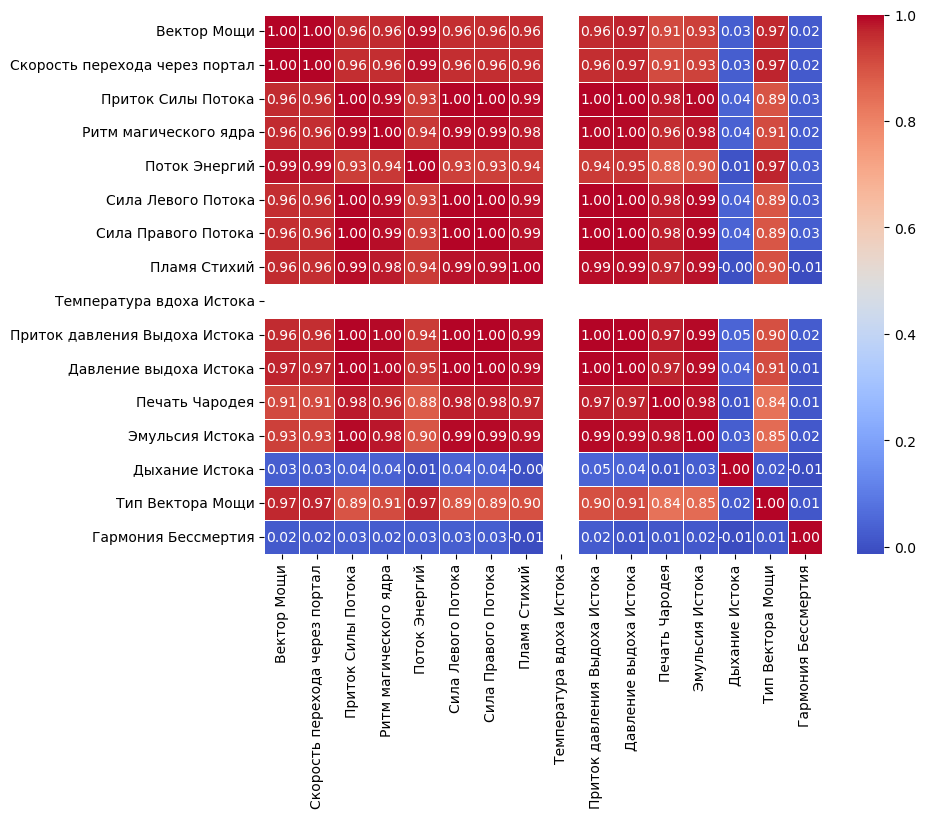

In [4]:
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr,
    annot=True,           
    fmt=".2f",            
    cmap="coolwarm",      
    linewidths=0.5        
)

На тепловой карте корреляции видим очень много линейно зависимых признаков. Это необходимо устранить для обучения моделей. При этом видим, что у признака `Температура вдоха истока` нет значений корреляции. Это из-за того, что в этом признаке одно уникальное значение, поэтому мы можем его удалить после генерации новых признаков на его основе.

## <a id='toc6_2_'></a>[Исправление проблемы мультиколлинеарности в данных](#toc0_)

In [6]:
df_train['Температура вдоха Истока'].value_counts()

Температура вдоха Истока
736.0    9422
Name: count, dtype: int64

Видим, что признак `Температура вдоха Истока` никак не описывает объект, все значения в нём одинаковые

Сгенерируем новые признаки на основе существующий при помощи формул прикладной области, описанный в разделе `Описание исходных данных`.  Обратим внимание, что мы не можем генерировать признаки на основе признака `Гармония Бессмертия`, так как он целевой и это приведёт к утечке данных

In [7]:
df_train['Общая мощность потоков'] = df_train['Сила Левого Потока'] + df_train['Сила Правого Потока'] + df_train['Приток Силы Потока']

df_test['Общая мощность потоков'] = df_test['Сила Левого Потока'] + df_test['Сила Правого Потока'] + df_test['Приток Силы Потока']

In [9]:
df_train['Общая мощность ядра'] = df_train['Ритм магического ядра'] * df_train['Приток Силы Потока']

df_test['Общая мощность ядра'] = df_test['Ритм магического ядра'] * df_test['Приток Силы Потока']

In [10]:
df_train['Общее давление на выходе'] = df_train['Приток давления Выдоха Истока'] + df_train['Давление выдоха Истока']

df_test['Общее давление на выходе'] = df_test['Приток давления Выдоха Истока'] + df_test['Давление выдоха Истока']

In [11]:
df_train['Магическая производительность'] = df_train['Скорость перехода через портал'] / df_train['Эмульсия Истока']

df_test['Магическая производительность'] = df_test['Скорость перехода через портал'] / df_test['Эмульсия Истока']

In [12]:
df_train['Эффективность ядра'] = df_train['Общая мощность ядра'] / df_train['Эмульсия Истока']

df_test['Эффективность ядра'] = df_test['Общая мощность ядра'] / df_test['Эмульсия Истока']

In [13]:
df_train.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Приток давления Выдоха Истока,...,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия,Общая мощность потоков,Общая мощность ядра,Общее давление на выходе,Магическая производительность,Эффективность ядра
8352,1.138,1.54332,4855.828,138.294898,6632.781,5.864,5.864,593.795,736.0,1.251,...,30.084,0.261,0.985,1.0,0.993,4867.556,6.715362e+05,8.005,5.913103,2.572936e+06
2542,5.140,7.71660,21637.112,201.517147,8505.087,175.319,175.319,704.763,736.0,2.075,...,24.906,0.493,0.960,3.0,0.997,21987.750,4.360249e+06,13.038,15.652333,8.844319e+06
3562,8.206,12.34656,50996.143,323.328422,9311.233,438.007,438.007,936.812,736.0,3.583,...,61.369,1.215,0.965,4.0,0.980,51872.157,1.648850e+07,22.159,10.161778,1.357078e+07
3371,6.175,9.25992,29791.710,241.632772,8823.437,246.257,246.257,781.806,736.0,2.504,...,34.669,0.686,0.964,3.0,0.985,30284.224,7.198653e+06,15.749,13.498426,1.049366e+07
6000,7.148,10.80324,38990.686,280.447568,9128.197,332.290,332.290,821.369,736.0,2.971,...,43.688,0.865,0.975,4.0,0.991,39655.266,1.093484e+07,18.459,12.489295,1.264144e+07


In [14]:
df_train['Магическая мощность'] = df_train['Эмульсия Истока'] + df_train['Общее давление на выходе'] + df_train['Пламя Стихий'] - df_train['Температура вдоха Истока']

df_test['Магическая мощность'] = df_test['Эмульсия Истока'] + df_test['Общее давление на выходе'] + df_test['Пламя Стихий'] - df_test['Температура вдоха Истока']

После генерации признаков, удалим линейно зависимые признаки, которые участвовали в генерации новых признаков. А именно:
- 'Сила Левого Потока',
- 'Сила Правого Потока',
- 'Приток Силы Потока',
- 'Ритм магического ядра',
- 'Приток давления Выдоха Истока',
- 'Давление выдоха Истока',
- 'Скорость перехода через портал',
- 'Эмульсия Истока',
- 'Общая мощность ядра',
- 'Общее давление на выходе',
- 'Пламя Стихий',
- 'Температура вдоха Истока'

In [20]:
dropped_columns = [
    'Сила Левого Потока',
    'Сила Правого Потока',
    'Приток Силы Потока',
    'Ритм магического ядра',
    'Приток давления Выдоха Истока',
    'Давление выдоха Истока',
    'Скорость перехода через портал',
    'Эмульсия Истока',
    'Общая мощность ядра',
    'Общее давление на выходе',
    'Пламя Стихий',
    'Температура вдоха Истока',
]
df_train = df_train.drop(columns=dropped_columns)
df_test = df_test.drop(columns=dropped_columns)

Построим тепловую карту корреляции после генерации и удаления признаков

In [21]:
corr = df_train.corr()

<Axes: >

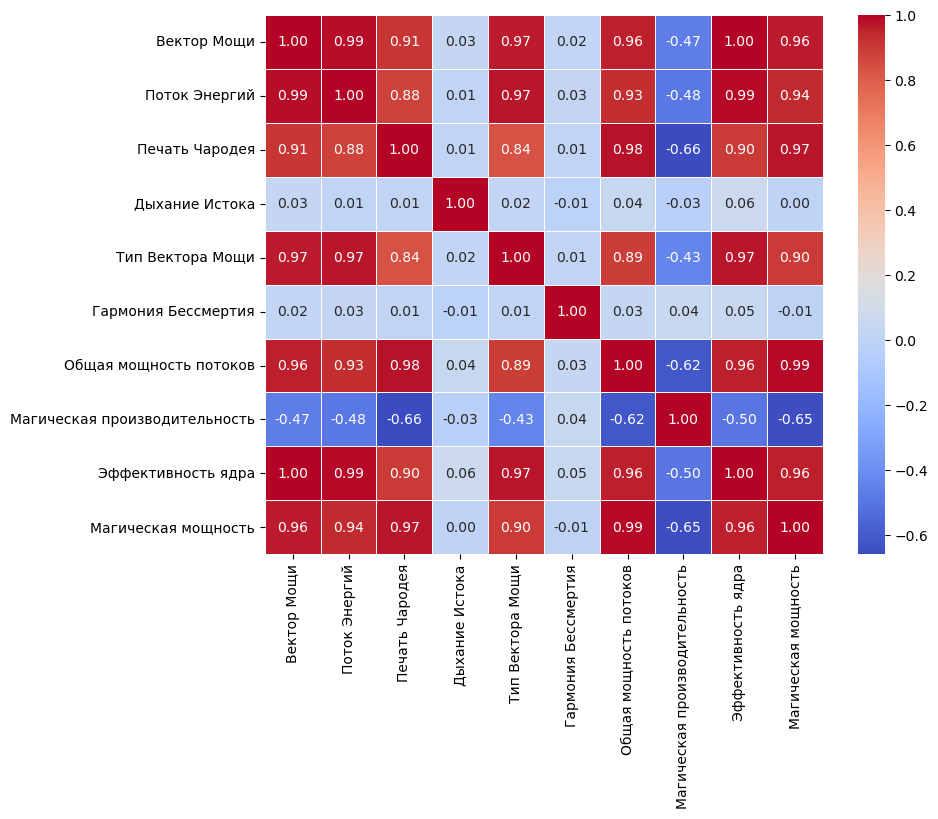

In [22]:
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr,
    annot=True,           
    fmt=".2f",            
    cmap="coolwarm",      
    linewidths=0.5        
)

Видим, что линейно зависимых признаков стало гораздо меньше, однако они всё равно присутствуют. Исправим это далее при помощи PCA

## <a id='toc6_3_'></a>[Скалирование данных](#toc0_)

Применим следующее скалирование:
- StandardScaler
- MinMaxScaler
- RobustScaler

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
std_scaler = StandardScaler()
df_train_std_scaled = std_scaler.fit_transform(df_train)
df_train_std_scaled = pd.DataFrame(
    df_train_std_scaled,
    columns=df_train.columns,  
    index=df_train.index        
)

In [26]:
df_train_std_scaled.describe()

,Вектор Мощи,Поток Энергий,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия,Общая мощность потоков,Магическая производительность,Эффективность ядра,Магическая мощность
count,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03,9.422000e+03
mean,-3.348344e-16,2.021073e-16,-6.183879e-17,6.108465e-17,8.144621e-17,1.223277e-14,8.747926e-17,-1.478098e-16,-5.731400e-17,7.541315e-18
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,-1.532124e+00,-1.472269e+00,-1.309971e+00,-1.720437e+00,-1.433234e+00,-1.686215e+00,-1.219528e+00,-2.212769e+00,-1.891908e+00,-1.686059e+00
25%,-7.597967e-01,-1.041300e+00,-7.924566e-01,-8.326879e-01,-5.654837e-01,-8.851569e-01,-8.457263e-01,-8.196975e-01,-8.694373e-01,-8.404084e-01
50%,8.680428e-03,2.744176e-01,-3.051066e-01,-1.322716e-02,3.022667e-01,4.941076e-02,-2.332001e-01,-5.859744e-02,1.066241e-02,-1.541520e-01
75%,7.817777e-01,8.758845e-01,4.568255e-01,8.745220e-01,1.170017e+00,8.504687e-01,5.700461e-01,9.573699e-01,9.054316e-01,5.929314e-01
max,1.610316e+00,1.491648e+00,2.316508e+00,1.693983e+00,1.170017e+00,1.651527e+00,2.133259e+00,2.651261e+00,1.649180e+00,2.184466e+00


Видим, что после применения `StandardScaler` порядок величин становится почти одинаковый

In [27]:
minmax_scaler = MinMaxScaler()
df_train_minmax_scaled = minmax_scaler.fit_transform(df_train)
df_train_minmax_scaled = pd.DataFrame(
    df_train_minmax_scaled,
    columns=df_train.columns,  
    index=df_train.index        
)

In [28]:
df_train_minmax_scaled.describe()

,Вектор Мощи,Поток Энергий,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия,Общая мощность потоков,Магическая производительность,Эффективность ядра,Магическая мощность
count,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000,9422.000000
mean,0.487559,0.496731,0.361224,0.503874,0.550555,0.505196,0.363736,0.454925,0.534273,0.435615
std,0.318241,0.337409,0.275764,0.292891,0.384155,0.299620,0.298275,0.205602,0.282414,0.258377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245773,0.145405,0.142704,0.260000,0.333333,0.240000,0.111490,0.286403,0.288745,0.218485
50%,0.490321,0.589317,0.277091,0.500000,0.666667,0.520000,0.294182,0.442878,0.537284,0.395788
75%,0.736339,0.792247,0.487193,0.760000,1.000000,0.760000,0.533757,0.651752,0.789966,0.588807
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


После применения `MinMaxScaler` порядок величин становится одинаковым

In [29]:
robust_scaler = RobustScaler()
df_train_robust_scaled = robust_scaler.fit_transform(df_train)
df_train_robust_scaled = pd.DataFrame(
    df_train_robust_scaled,
    columns=df_train.columns,  
    index=df_train.index        
)

In [30]:
df_train_robust_scaled.describe()

,Вектор Мощи,Поток Энергий,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Гармония Бессмертия,Общая мощность потоков,Магическая производительность,Эффективность ядра,Магическая мощность
count,9422.000000,9.422000e+03,9.422000e+03,9422.000000,9422.000000,9422.000000,9.422000e+03,9422.000000,9422.000000,9422.000000
mean,-0.005631,-1.431357e-01,2.442255e-01,0.007748,-0.174167,-0.028469,1.647158e-01,0.032974,-0.006007,0.107547
std,0.648722,5.216258e-01,8.005022e-01,0.585782,0.576233,0.576192,7.063657e-01,0.562755,0.563452,0.697708
min,-0.999500,-9.110687e-01,-8.043539e-01,-1.000000,-1.000000,-1.000000,-6.966713e-01,-1.212206,-1.071950,-1.068767
25%,-0.498501,-6.862760e-01,-3.901041e-01,-0.480000,-0.500000,-0.538462,-4.326445e-01,-0.428290,-0.495867,-0.478781
50%,0.000000,4.382820e-16,-5.665973e-17,0.000000,0.000000,0.000000,5.836344e-17,0.000000,0.000000,0.000000
75%,0.501499,3.137240e-01,6.098959e-01,0.520000,0.500000,0.461538,5.673555e-01,0.571710,0.504133,0.521219
max,1.038961,6.349052e-01,2.098497e+00,1.000000,0.500000,0.923077,1.671497e+00,1.524905,0.923177,1.631586


In [29]:
df_test_std_scaled = std_scaler.transform(df_test)
df_test_std_scaled = pd.DataFrame(
    df_test_std_scaled,
    columns=df_test.columns,  
    index=df_test.index        
)

In [30]:
df_test_minmax_scaled = std_scaler.transform(df_test)
df_test_minmax_scaled = pd.DataFrame(
    df_test_minmax_scaled,
    columns=df_test.columns,  
    index=df_test.index        
)

In [33]:
df_test_robust_scaled = robust_scaler.transform(df_test)
df_test_robust_scaled = pd.DataFrame(
    df_test_robust_scaled,
    columns=df_test.columns,  
    index=df_test.index        
)

In [36]:
data = {
    'df_train_std_scaled': df_train_std_scaled,
    'df_test_std_scaled': df_test_std_scaled,
    'df_train_minmax_scaled': df_train_minmax_scaled,
    'df_test_minmax_scaled': df_test_minmax_scaled,
    'df_train_robust_scaled': df_train_robust_scaled,
    'df_test_robust_scaled': df_test_robust_scaled,
}

In [37]:
with open(r'../../data/lab5_scaled_data.pkl', 'wb') as f:
    pickle.dump(data, f)

### <a id='toc6_3_1_'></a>[Уменьшим признаковое пространстов с помощью PCA](#toc0_)

На предыдущем этапе мы сделали меньше линейно зависимых признаков, однако всё равно присутствует мультиколлинеарность. Для борьбы с нею и для уменьшения количества признаков воспользуемся PCA, которых хорошо работает с линейными зависимостями

In [34]:
from sklearn.decomposition import PCA

In [46]:
X_train_std = df_train_std_scaled.drop(columns=['Гармония Бессмертия'])
X_test_std = df_test_std_scaled.drop(columns=['Гармония Бессмертия'])
y_train_std = df_train_std_scaled['Гармония Бессмертия']
y_test_std = df_test_std_scaled['Гармония Бессмертия']

X_train_minmax = df_train_minmax_scaled.drop(columns=['Гармония Бессмертия'])
X_test_minmax = df_test_minmax_scaled.drop(columns=['Гармония Бессмертия'])
y_train_minmax = df_train_minmax_scaled['Гармония Бессмертия']
y_test_minmax = df_test_minmax_scaled['Гармония Бессмертия']

X_train_robust = df_train_robust_scaled.drop(columns=['Гармония Бессмертия'])
X_test_robust = df_test_robust_scaled.drop(columns=['Гармония Бессмертия'])
y_train_robust = df_train_robust_scaled['Гармония Бессмертия']
y_test_robust = df_test_robust_scaled['Гармония Бессмертия']

In [47]:
pca_std = PCA(n_components=X_train_std.shape[1])
pca_std.fit(X_train_std)

pca_minmax = PCA(n_components=X_train_minmax.shape[1])
pca_minmax.fit(X_train_minmax)

pca_robust = PCA(n_components=X_train_robust.shape[1])
pca_robust.fit(X_train_robust)

PCA(n_components=9)

In [52]:
explained_variance_ratio_std= pca_std.explained_variance_ratio_
cumulative_variance_std = np.cumsum(explained_variance_ratio_std)

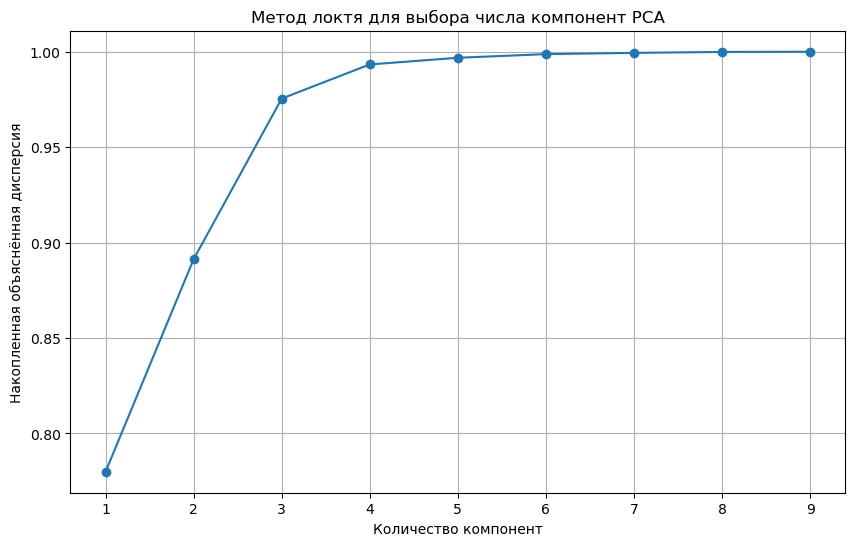

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance_std)+1), cumulative_variance_std, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объяснённая дисперсия')
plt.title('Метод локтя для выбора числа компонент PCA')
plt.grid(True)
plt.show()

In [54]:
explained_variance_ratio_mn = pca_minmax.explained_variance_ratio_
cumulative_variance_mn = np.cumsum(explained_variance_ratio_mn)

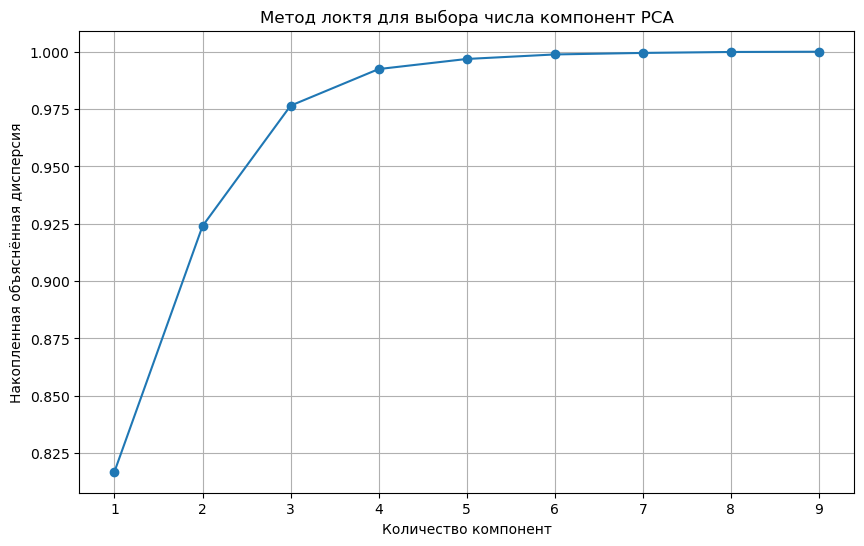

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance_mn)+1), cumulative_variance_mn, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объяснённая дисперсия')
plt.title('Метод локтя для выбора числа компонент PCA')
plt.grid(True)
plt.show()

In [56]:
explained_variance_ratio_rob = pca_robust.explained_variance_ratio_
cumulative_variance_rob = np.cumsum(explained_variance_ratio_rob)

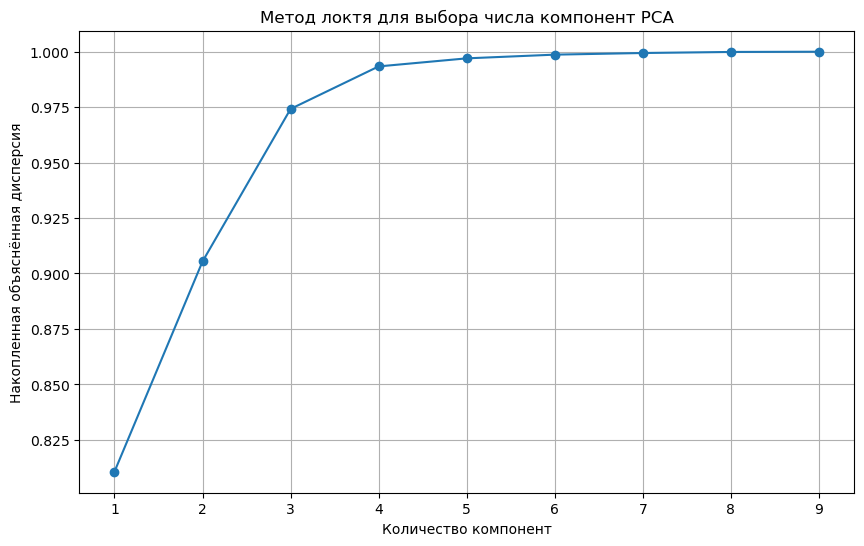

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance_rob)+1), cumulative_variance_rob, marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная объяснённая дисперсия')
plt.title('Метод локтя для выбора числа компонент PCA')
plt.grid(True)
plt.show()

По графикам видно, что лучше всего оставить 4 компоненты. Они объясняют около 98% дисперсии

In [58]:
pca_std = PCA(n_components=4)
X_train_pca_std = pca_std.fit_transform(X_train)
X_test_pca_std = pca_std.transform(X_test)

pca_minmax = PCA(n_components=4)
X_train_pca_minmax = pca_minmax.fit_transform(X_train)
X_test_pca_minmax = pca_minmax.transform(X_test)

pca_robust = PCA(n_components=4)
X_train_pca_robust = pca_robust.fit_transform(X_train)
X_test_pca_robust = pca_robust.transform(X_test)

In [59]:
X_train_pca_df_std = pd.DataFrame(X_train_pca_std, columns=[f'PC{i+1}' for i in range(4)], index=X_train.index)
X_test_pca_df_std = pd.DataFrame(X_test_pca_std, columns=[f'PC{i+1}' for i in range(4)], index=X_test.index)

X_train_pca_df_minmax = pd.DataFrame(X_train_pca_minmax, columns=[f'PC{i+1}' for i in range(4)], index=X_train.index)
X_test_pca_df_minmax = pd.DataFrame(X_test_pca_minmax, columns=[f'PC{i+1}' for i in range(4)], index=X_test.index)

X_train_pca_df_robust = pd.DataFrame(X_train_pca_robust, columns=[f'PC{i+1}' for i in range(4)], index=X_train.index)
X_test_pca_df_robust = pd.DataFrame(X_test_pca_robust, columns=[f'PC{i+1}' for i in range(4)], index=X_test.index)

In [60]:
with open(r'../../data/pca_data_scaled.pkl', 'wb') as f:
    data = {
        'X_train_std': X_train_pca_df_std,
        'X_test_std': X_train_pca_df_std,
        'X_train_minmax': X_train_pca_df_minmax,
        'X_test_minmax': X_test_pca_df_minmax,
        'X_train_robust': X_train_pca_df_robust,
        'X_test_robust': X_test_pca_df_robust,
        'y_train': y_train,
        'y_test': y_test
    }
    pickle.dump(data, f)

## <a id='toc6_4_'></a>[Подведение итогов раздела 2](#toc0_)

В результате данного раздела мы провели корреляционный анализ и выявили множество линейно зависимых признаков. Для их устранения мы генерировали новые признаки на основе формул прикладной области. Так же мы удилили некоторые признаки. В результате мы уменьшили множество линейно зависимых признаков. Чтобы окончательно избавиться от мультиколлинеарности, мы сузили признаковое просторанстов до 4 признаков c помощью PCA

# <a id='toc7_'></a>[Выбор моделей ML и метрик](#toc0_)

### <a id='toc7_1_1_'></a>[Выбор моделей](#toc0_)

В ходе данной работы были выбраны следующие модели:
1. Gradient boosting
2. Random forest
3. Ridge regression

Линейная модель была выбрана, чтобы сравнить её с древовидными ансамблевыми моделям, а также, чтобы убедиться, что у признаков нет линейных зависимостей с целевым признаком после применения PCA.

Так как в данных отсутствуют линейные зависимости после устранения мультиколлинеарности, то выбор моделей остановился на древовидных моделях. Будем использовть ансамблевые модели, так как они покзывают лучший результат по сревнению с обыкновенными моделями.

`Random Forest` снижает дисперсию и уменьшает риск переобучения. Так как мы не знаем, что за суть данных такого необычного датасета, это может нам помощь.

`Gradien Boosting` снижает смещение модели. Благодаря этому метрики, скорее всего получатся самыми лучшими. Да и впринципе Gradien Boosting зачастую показывает наилучшие результаты, не считая нейросетевые модели. Однако есть вероятность к переобучиться.

`Ridge regression` - самая простая из моделей. Самая интерпретируемая, однако не подходит для линейно независимых данных. Обучим её для интереса и сравнения с древовидными моделями

**Концептуальная работа моделей**

`Gradient boosting` концептуально работает как поэтапное улучшение модели, где итоговое предсказание является суммой большого числа простых моделей. Сначала используется самое примитивное приближение, обычно константа, которая даёт базовый уровень предсказаний. Затем для каждого объекта вычисляется ошибка через функцию потерь и определяется её градиент по текущему предсказанию  он показывает, в каком направлении и насколько нужно изменить ответ, чтобы уменьшить ошибку. На этих градиентах обучается новая слабая модель, чаще всего неглубокое дерево решений, задача которой  предсказывать поправку к уже существующей модели. Эта поправка добавляется к ансамблю с небольшим коэффициентом обучения, чтобы улучшение происходило постепенно и контролируемо. Процесс повторяется много раз, и каждая новая модель фокусируется именно на тех ошибках, которые не были исправлены ранее.

`Random Forest` концептуально работает как усреднение большого количества независимых деревьев решений, каждое из которых обучается на бутстрап выборках. Для каждого дерева из обучающей выборки берётся bootstrap-выборка, а при каждом разбиении узла рассматривается случайное подмножество признаков, из-за чего деревья получаются разными и слабо коррелированными. Каждое отдельное дерево склонно к переобучению и может давать нестабильные предсказания, но их ошибки, как правило, не совпадают. За счёт усреднения предсказаний по всем деревьям эти случайные ошибки взаимно компенсируются, и итоговая модель становится более устойчивой и хорошо обобщающей на новые данные.

`Ridge regression` концептуально работает как линейная регрессия, в которой к минимизации ошибки добавляется штраф за слишком большие значения коэффициентов. Этот штраф реализуется через L2-регуляризацию и приводит к тому, что модель становится менее чувствительной к шуму и мультиколлинеарности, поскольку ни один признак не может доминировать за счёт чрезмерно большого коэффициента. При этом коэффициенты не зануляются как при Lasso

### <a id='toc7_1_2_'></a>[Выбор метрик](#toc0_)

Для оценки качества модели в данной работе используются метрики `R2` и `MAPE`, поскольку обе они являются относительными и хорошо подходят для анализа результатов на сгенерированных данных, где абсолютные масштабы значений не несут самостоятельного прикладного смысла.

Коэффициент детерминации R2 показывает, какую долю дисперсии целевой переменной объясняет модель относительно простой базовой модели, предсказывающей среднее значение. Тем самым R2 позволяет оценивать не абсолютную величину ошибки, а то, насколько модель улавливает структуру и закономерности в данных. Для синтетических данных это особенно важно, поскольку они создаются искусственно и интерес представляет именно степень воспроизведения заложенных зависимостей

Метрика MAPE, в свою очередь, измеряет ошибку в относительных процентах по отношению к истинным значениям. Это делает её инвариантной к масштабу данных и позволяет корректно сравнивать качество модели при различных диапазонах значений целевой переменной, что характерно для сгенерированных выборок. Поскольку синтетические данные не имеют естественной цены ошибки в абсолютных величинах, процентная интерпретация ошибки является более информативной и интерпретируемой.

In [ ]:
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

### <a id='toc7_1_3_'></a>[Формируем сетки гиперпараметров](#toc0_)

In [ ]:
from sklearn.model_selection import KFold

In [8]:
def objective_cb(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 500, 2000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "random_strength": trial.suggest_float("random_strength", 0.1, 10),
        "loss_function": "RMSE",
        "verbose": False,
        "random_state": 42
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model = CatBoostRegressor(**params)

        model.fit(
            X_tr, y_tr,
            eval_set=(X_val, y_val),
            early_stopping_rounds=50,
            use_best_model=True,
            verbose=False
        )

        y_pred = model.predict(X_val)
        score = r2_score(y_val, y_pred)
        cv_scores.append(score)

    return np.mean(cv_scores)

In [16]:
def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "random_state": 42,
        "n_jobs": -1
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model = RandomForestRegressor(**params)

        model.fit(X_tr, y_tr)
        
        y_pred_val = model.predict(X_val)
        
        score = r2_score(y_val, y_pred_val)
        cv_scores.append(score)

    return np.mean(cv_scores)

In [ ]:
def objective_ridge(trial):
    alpha = trial.suggest_float("alpha", 1e-4, 1000, log=True)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []

    for train_idx, val_idx in kf.split(X_train, y_train):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]

        model = Ridge(alpha=alpha)

        model.fit(X_tr, y_tr)
        y_pred_val = model.predict(X_val)

        score = r2_score(y_val, y_pred_val)
        cv_scores.append(score)

    return np.mean(cv_scores)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# <a id='toc8_'></a>[Обучение моделей ML, подбор гиперпараметров и вычисление метрик](#toc0_)

### <a id='toc8_1_1_'></a>[CatBoost](#toc0_)

In [34]:
for name, X_curr in datasets.items():
    print(f"\n{'='*30}")
    print(f"Оптимизация CatBoost для скалера: {name}")
    print(f"{'='*30}")

    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective_cb(trial, X_curr, y_train), n_trials=5)

    best_params = study.best_params
    best_params.update({
        "loss_function": "RMSE",
        "verbose": 0,
        "random_state": 42
    })

    final_model = CatBoostRegressor(**best_params)

    scoring_metrics = {
        "r2": "r2",
        "mape": "neg_mean_absolute_percentage_error"
    }

    cv_results = cross_validate(
        final_model,
        X_curr,
        y_train,
        cv=5,
        scoring=scoring_metrics,
        n_jobs=-1
    )

    mean_r2 = np.mean(cv_results["test_r2"])
    mean_mape = -np.mean(cv_results["test_mape"])

    final_model.fit(X_curr, y_train)

    final_results_cb[name] = {
        "best_r2_cv": mean_r2,
        "best_mape_cv": mean_mape,
        "best_par": best_params
    }

print("\nИТОГОВЫЕ РЕЗУЛЬТАТЫ (CatBoost)")
for name, res in final_results_cb.items():
    print(f"{name:<15} | {res['best_r2_cv']:.4f}     | {res['best_mape_cv']:.2%}")

[I 2025-12-20 12:34:39,675] A new study created in memory with name: no-name-2a39544b-feb5-458c-be3e-688f93a1d5eb



Оптимизация CatBoost для скалера: Standard


[I 2025-12-20 12:34:57,749] Trial 0 finished with value: 0.9094668745713455 and parameters: {'iterations': 950, 'depth': 7, 'learning_rate': 0.022512718017793316, 'l2_leaf_reg': 0.14850289477436304, 'bagging_temperature': 0.32625093510515657, 'random_strength': 2.9678639106142493}. Best is trial 0 with value: 0.9094668745713455.
[I 2025-12-20 12:35:13,709] Trial 1 finished with value: 0.8765483346203942 and parameters: {'iterations': 1697, 'depth': 4, 'learning_rate': 0.02659441755205141, 'l2_leaf_reg': 0.07196838296192717, 'bagging_temperature': 0.5437604460998182, 'random_strength': 2.760996246483431}. Best is trial 0 with value: 0.9094668745713455.
[I 2025-12-20 12:35:22,720] Trial 2 finished with value: 0.9242742183395638 and parameters: {'iterations': 1058, 'depth': 6, 'learning_rate': 0.19354056757873397, 'l2_leaf_reg': 0.0010354619073801503, 'bagging_temperature': 0.16677916826107142, 'random_strength': 7.1423225719850265}. Best is trial 2 with value: 0.9242742183395638.
[I 2025


Оптимизация CatBoost для скалера: MinMax


[I 2025-12-20 12:37:13,558] Trial 0 finished with value: 0.9279673580964302 and parameters: {'iterations': 1955, 'depth': 6, 'learning_rate': 0.06828824316232471, 'l2_leaf_reg': 0.014464257860062484, 'bagging_temperature': 0.21602779791206217, 'random_strength': 7.072276744719075}. Best is trial 0 with value: 0.9279673580964302.
[I 2025-12-20 12:37:36,169] Trial 1 finished with value: 0.9281506747064204 and parameters: {'iterations': 1107, 'depth': 9, 'learning_rate': 0.20267036115357412, 'l2_leaf_reg': 0.00971632813306658, 'bagging_temperature': 0.553139496064833, 'random_strength': 5.980629543608088}. Best is trial 1 with value: 0.9281506747064204.
[I 2025-12-20 12:37:44,143] Trial 2 finished with value: 0.742063791808296 and parameters: {'iterations': 792, 'depth': 4, 'learning_rate': 0.017401668321298955, 'l2_leaf_reg': 0.11579049311488399, 'bagging_temperature': 0.31102053605806945, 'random_strength': 1.6344632273423456}. Best is trial 1 with value: 0.9281506747064204.
[I 2025-12-


Оптимизация CatBoost для скалера: Robust


[I 2025-12-20 12:40:13,200] Trial 0 finished with value: 0.934134505950907 and parameters: {'iterations': 1519, 'depth': 10, 'learning_rate': 0.04327307120711982, 'l2_leaf_reg': 0.0010723130292386973, 'bagging_temperature': 0.3130167014150633, 'random_strength': 1.8904260445555188}. Best is trial 0 with value: 0.934134505950907.
[I 2025-12-20 12:41:00,776] Trial 1 finished with value: 0.9316618253357317 and parameters: {'iterations': 1567, 'depth': 9, 'learning_rate': 0.05031265470176954, 'l2_leaf_reg': 0.008054682842960549, 'bagging_temperature': 0.4059155657811321, 'random_strength': 9.629990962750322}. Best is trial 0 with value: 0.934134505950907.
[I 2025-12-20 12:41:24,621] Trial 2 finished with value: 0.9264843709828252 and parameters: {'iterations': 1718, 'depth': 6, 'learning_rate': 0.03134398096592136, 'l2_leaf_reg': 0.020157748154806598, 'bagging_temperature': 0.48871377196814036, 'random_strength': 0.8164945303692565}. Best is trial 0 with value: 0.934134505950907.
[I 2025-1


ИТОГОВЫЕ РЕЗУЛЬТАТЫ (CatBoost)
Standard        | 0.9288     | 25.65%
MinMax          | 0.9215     | 26.44%
Robust          | 0.9293     | 24.29%


### <a id='toc8_1_2_'></a>[Random Forest](#toc0_)

In [30]:
for name, X_curr in datasets.items():
    print(f"\n{'='*30}")
    print(f"Оптимизация Random Forest для скалера: {name}")
    print(f"{'='*30}")

    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective_rf(trial, X_curr, y_train), n_trials=10)

    best_params = study.best_params
    best_params.update({"n_jobs": -1, "random_state": 42})
    
    final_model = RandomForestRegressor(**best_params)
    scoring_metrics = {
        'r2': 'r2',
        'mape': 'neg_mean_absolute_percentage_error' 
    }
    
    cv_results = cross_validate(
        final_model, 
        X_curr, 
        y_train, 
        cv=5, 
        scoring=scoring_metrics, 
        n_jobs=-1
    )

    mean_r2 = np.mean(cv_results['test_r2'])
    mean_mape = -np.mean(cv_results['test_mape'])

    final_model.fit(X_curr, y_train)

    final_results_rf[name] = {
        "best_r2_cv": mean_r2,
        "best_mape_cv": mean_mape,
        "best_par": best_params
    }

print("\nИТОГОВЫЕ РЕЗУЛЬТАТЫ (Random Forest)")
print(f"{'Scaler':<15} | {'R2':<10} | {'MAPE':<10}")
print("-" * 40)
for name, res in final_results_rf.items():
    print(f"{name:<15} | {res['best_r2_cv']:.4f}     | {res['best_mape_cv']:.2%}")

[I 2025-12-20 12:19:53,877] A new study created in memory with name: no-name-bea6fdba-27a0-47e3-aa17-547018660346



Оптимизация Random Forest для скалера: Standard


[I 2025-12-20 12:19:58,805] Trial 0 finished with value: 0.8961149503868787 and parameters: {'n_estimators': 250, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8961149503868787.
[I 2025-12-20 12:20:05,438] Trial 1 finished with value: 0.8635776084869896 and parameters: {'n_estimators': 367, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8961149503868787.
[I 2025-12-20 12:20:12,169] Trial 2 finished with value: 0.6152006705454908 and parameters: {'n_estimators': 459, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8961149503868787.
[I 2025-12-20 12:20:19,999] Trial 3 finished with value: 0.9167863431742154 and parameters: {'n_estimators': 389, 'max_depth': 22, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 3 with value: 0.9167863431742154.
[I 2025-12-20 12:20:23,715] Trial 4 finished with value: 0.904040853964803 and parameters:


Оптимизация Random Forest для скалера: MinMax


[I 2025-12-20 12:21:02,486] Trial 0 finished with value: 0.9311924809183114 and parameters: {'n_estimators': 347, 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9311924809183114.
[I 2025-12-20 12:21:04,047] Trial 1 finished with value: 0.9026762250541956 and parameters: {'n_estimators': 59, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9311924809183114.
[I 2025-12-20 12:21:07,428] Trial 2 finished with value: 0.8430565026556286 and parameters: {'n_estimators': 179, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9311924809183114.
[I 2025-12-20 12:21:10,541] Trial 3 finished with value: 0.9080223320771463 and parameters: {'n_estimators': 146, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9311924809183114.
[I 2025-12-20 12:21:19,445] Trial 4 finished with value: 0.9077927885727833 and parameters: {


Оптимизация Random Forest для скалера: Robust


[I 2025-12-20 12:21:51,226] Trial 0 finished with value: 0.9038312229460066 and parameters: {'n_estimators': 112, 'max_depth': 23, 'min_samples_split': 9, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9038312229460066.
[I 2025-12-20 12:21:56,491] Trial 1 finished with value: 0.5046192135376751 and parameters: {'n_estimators': 393, 'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9038312229460066.
[I 2025-12-20 12:22:01,720] Trial 2 finished with value: 0.9095630357449357 and parameters: {'n_estimators': 262, 'max_depth': 21, 'min_samples_split': 19, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.9095630357449357.
[I 2025-12-20 12:22:07,290] Trial 3 finished with value: 0.389704799791972 and parameters: {'n_estimators': 446, 'max_depth': 5, 'min_samples_split': 15, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.9095630357449357.
[I 2025-12-20 12:22:15,073] Trial 4 finished with value: 0.9128141152674711 and parameters: {


ИТОГОВЫЕ РЕЗУЛЬТАТЫ (Random Forest)
Scaler          | R2         | MAPE      
----------------------------------------
Standard        | 0.9142     | 25.80%
MinMax          | 0.9284     | 22.54%
Robust          | 0.9225     | 24.96%


### <a id='toc8_1_3_'></a>[Ridge](#toc0_)

In [38]:
for name, X_curr in datasets.items():
    print(f"\n{'='*30}")
    print(f"Оптимизация Ridge для скалера: {name}")
    print(f"{'='*30}")

    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective_ridge(trial, X_curr, y_train), n_trials=20)

    best_params = study.best_params
    best_params.update({"random_state": 42})

    final_model = Ridge(**best_params)

    scoring_metrics = {
        "r2": "r2",
        "mape": "neg_mean_absolute_percentage_error"
    }

    cv_results = cross_validate(
        final_model,
        X_curr,
        y_train,
        cv=5,
        scoring=scoring_metrics,
        n_jobs=-1
    )

    mean_r2 = np.mean(cv_results["test_r2"])
    mean_mape = -np.mean(cv_results["test_mape"])

    final_model.fit(X_curr, y_train)

    final_results_ridge[name] = {
        "best_r2_cv": mean_r2,
        "best_mape_cv": mean_mape,
        "best_par": best_params
    }
    
print("\nИТОГОВЫЕ РЕЗУЛЬТАТЫ (Ridge)")
print(f"{'Scaler':<15} | {'R2':<10} | {'MAPE':<10}")
print("-" * 40)
for name, res in final_results_ridge.items():
    print(f"{name:<15} | {res['best_r2_cv']:.4f}     | {res['best_mape_cv']:.2%}")

[I 2025-12-20 12:47:59,345] A new study created in memory with name: no-name-9beda047-d9e0-453d-a8ae-6d2a1f5e1165
[I 2025-12-20 12:47:59,367] Trial 0 finished with value: 0.003894461282977413 and parameters: {'alpha': 0.08185349633682257}. Best is trial 0 with value: 0.003894461282977413.
[I 2025-12-20 12:47:59,389] Trial 1 finished with value: 0.0038971296476943305 and parameters: {'alpha': 15.157621370565868}. Best is trial 1 with value: 0.0038971296476943305.
[I 2025-12-20 12:47:59,412] Trial 2 finished with value: 0.00389445880651631 and parameters: {'alpha': 0.0686862212502256}. Best is trial 1 with value: 0.0038971296476943305.
[I 2025-12-20 12:47:59,436] Trial 3 finished with value: 0.0038944560722609543 and parameters: {'alpha': 0.05414986352550514}. Best is trial 1 with value: 0.0038971296476943305.
[I 2025-12-20 12:47:59,458] Trial 4 finished with value: 0.0038944467564109076 and parameters: {'alpha': 0.004635828654969583}. Best is trial 1 with value: 0.0038971296476943305.
[


Оптимизация Ridge для скалера: Standard


[I 2025-12-20 12:47:59,543] Trial 8 finished with value: 0.003894446151447406 and parameters: {'alpha': 0.0014211031408639166}. Best is trial 1 with value: 0.0038971296476943305.
[I 2025-12-20 12:47:59,563] Trial 9 finished with value: 0.0038944463510528714 and parameters: {'alpha': 0.0024817807070468432}. Best is trial 1 with value: 0.0038971296476943305.
[I 2025-12-20 12:47:59,586] Trial 10 finished with value: 0.003902272570847276 and parameters: {'alpha': 51.47840128757132}. Best is trial 10 with value: 0.003902272570847276.
[I 2025-12-20 12:47:59,608] Trial 11 finished with value: 0.0039050586775435823 and parameters: {'alpha': 78.84507918767326}. Best is trial 11 with value: 0.0039050586775435823.
[I 2025-12-20 12:47:59,636] Trial 12 finished with value: 0.0039055876512437806 and parameters: {'alpha': 85.26076148316771}. Best is trial 12 with value: 0.0039055876512437806.
[I 2025-12-20 12:47:59,659] Trial 13 finished with value: 0.0038951298250257116 and parameters: {'alpha': 3.6


Оптимизация Ridge для скалера: MinMax


[I 2025-12-20 12:48:00,031] Trial 10 finished with value: 0.003894448873096512 and parameters: {'alpha': 0.01588436679075911}. Best is trial 2 with value: 0.003904588170531298.
[I 2025-12-20 12:48:00,053] Trial 11 finished with value: 0.003906521184737821 and parameters: {'alpha': 98.2352399288133}. Best is trial 11 with value: 0.003906521184737821.
[I 2025-12-20 12:48:00,076] Trial 12 finished with value: 0.0039062114671128967 and parameters: {'alpha': 93.6462366556192}. Best is trial 11 with value: 0.003906521184737821.
[I 2025-12-20 12:48:00,099] Trial 13 finished with value: 0.0039028813536445828 and parameters: {'alpha': 56.77703498996963}. Best is trial 11 with value: 0.003906521184737821.
[I 2025-12-20 12:48:00,121] Trial 14 finished with value: 0.0038947480908596787 and parameters: {'alpha': 1.6162341758981367}. Best is trial 11 with value: 0.003906521184737821.
[I 2025-12-20 12:48:00,146] Trial 15 finished with value: 0.003906237905890575 and parameters: {'alpha': 94.025520842


Оптимизация Ridge для скалера: Robust


[I 2025-12-20 12:48:00,460] Trial 8 finished with value: 0.003894487237125266 and parameters: {'alpha': 0.2199340775365576}. Best is trial 6 with value: 0.0039010497084965403.
[I 2025-12-20 12:48:00,479] Trial 9 finished with value: 0.0038944675437735166 and parameters: {'alpha': 0.11514813139583188}. Best is trial 6 with value: 0.0039010497084965403.
[I 2025-12-20 12:48:00,498] Trial 10 finished with value: 0.0039051132912869104 and parameters: {'alpha': 79.48272194530735}. Best is trial 10 with value: 0.0039051132912869104.
[I 2025-12-20 12:48:00,518] Trial 11 finished with value: 0.0039046838746839897 and parameters: {'alpha': 74.60452709407866}. Best is trial 10 with value: 0.0039051132912869104.
[I 2025-12-20 12:48:00,537] Trial 12 finished with value: 0.003906268244516698 and parameters: {'alpha': 94.46346590970236}. Best is trial 12 with value: 0.003906268244516698.
[I 2025-12-20 12:48:00,558] Trial 13 finished with value: 0.003895697189914604 and parameters: {'alpha': 6.8333353


ИТОГОВЫЕ РЕЗУЛЬТАТЫ (Ridge)
Scaler          | R2         | MAPE      
----------------------------------------
Standard        | 0.0037     | 100.98%
MinMax          | 0.0037     | 100.98%
Robust          | 0.0037     | 100.98%


# <a id='toc9_'></a>[Вычисление метрик на новых данных](#toc0_)

| **Модель**    | **Scaler** | **R2** | **MAPE, %** |
| ------------- | ---------- | -----: | ----------: |
| CatBoost      | Standard   | 0.9288 |       25.65 |
| CatBoost      | MinMax     | 0.9215 |       26.44 |
| CatBoost      | Robust     | 0.9293 |       24.29 |
| Random Forest | Standard   | 0.9142 |       25.80 |
| Random Forest | MinMax     | 0.9284 |       22.54 |
| Random Forest | Robust     | 0.9225 |       24.96 |
| Ridge         | Standard   | 0.0037 |      100.98 |
| Ridge         | MinMax     | 0.0037 |      100.98 |
| Ridge         | Robust     | 0.0037 |      100.98 |


# <a id='toc10_'></a>[Результат работы](#toc0_)

В результате работы можно сделать следующие выводы: лучше всего себя показала модель `Сat Boost` со `Standart Scaler` по метрике `R2`. 

А по метрике `MAPE` лучше всего покзала себя `Random Forest` с `MinMax Scaler`

Её метрики:
- Лучшая `R2`: 0.9288
- Лучшая `MAPE`: 22.54%

Это достаточно хорошие метрики: модель хорошо описывает дисперсию. А процент отклонения предсказываемых значений от среднего находится в пределах нормы. Данную модель можно использовать в проде для предсказания износа порталов